In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 




In [ ]:
df = pd.read_csv('../../Data/d_train_20180102.csv')

In [120]:
def custom_boxplot(df,baseVar,checkVar,category=True,bins=10):
    dfPlot = df.copy()
    if baseVar == checkVar:
        print(dfPlot[checkVar].T.values.tolist())
        plt.boxplot(dfPlot[checkVar].T.values.tolist(), labels =checkVar)  
        plt.show()
    else:
        if category:
            dfPlot = dfPlot.set_index(dfPlot[baseVar])
            plt.boxplot([dfPlot.loc[var,checkVar].tolist() for var in dfPlot[baseVar].unique()],labels =dfPlot[baseVar].unique()) 
            plt.show()
        else:
            dfPlot['bins'] = pd.qcut(dfPlot[baseVar],q=bins,labels=range(bins))
            dfPlot.sort_values('bins',ascending=True,inplace=True)
            dfPlot['bins'] = dfPlot['bins'].astype(str)
            dfPlot['bins'] = dfPlot['bins'].fillna('nan')
            print(dfPlot['bins'].unique())
            dfOutput = dfPlot.groupby(['bins'])
            data = []
            label =[]
            for name,grp in dfOutput:
                label.append(name)
                data.append(grp[checkVar].values.tolist())
            plt.boxplot(data,labels =label) 
            plt.show()


['nan' '0.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']


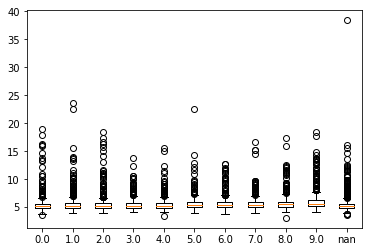

In [121]:
custom_boxplot(df,'PartI_1','Y',False)

In [55]:
a,b = pd.cut(df['PartI_1'],bins=10,retbins =True,labels=range(10))


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
5612    0.0
5613    NaN
5614    NaN
5615    0.0
5616    0.0
5617    0.0
5618    0.0
5619    0.0
5620    0.0
5621    0.0
5622    0.0
5623    0.0
5624    0.0
5625    0.0
5626    0.0
5627    0.0
5628    0.0
5629    0.0
5630    0.0
5631    0.0
5632    1.0
5633    0.0
5634    0.0
5635    0.0
5636    0.0
5637    0.0
5638    0.0
5639    0.0
5640    0.0
5641    0.0
Name: PartI_1, Length: 5642, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]